# Tensorflow intro
TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications (from https://www.tensorflow.org ).

It is a powerful tool for numerical computations. Its main principle is based on the computation graph of arithmetic expressions, which allows to compute derivatives and gradients efficiently.

<img src="exp.png">

## Exercise 1
Represent the above expression $f(x,y)$ using tensorflow.

**a)** Evaluate the expression and the derivative with respect to $x$ at $x=3,y=4$.

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [2]:
x = tf.placeholder(dtype=tf.float32, name='x')
y = tf.placeholder(dtype=tf.float32, name='y')
f = x*x*y + y + 2

print(f.eval({x: 3, y: 4}))

df = tf.gradients(f, x)[0]
print(df.eval({x: 3, y: 4}))

42.0
24.0


**b)** Set $y=1$ and plot $f$ and $\frac{\partial f}{\partial x}$ for $x\in [-10,10]$

In [3]:
import numpy as np
import matplotlib.pyplot as plt


s = np.linspace(-10, 10, 100)

plt.subplot(1,2,1)
plt.plot(f.eval({x: s, y:1}))

plt.subplot(1,2,2)
plt.plot(df.eval({x: s, y:1}))

plt.show()

<Figure size 640x480 with 2 Axes>

## Exercise 2
Implement a 1-hidden layer network to solve the first exercise from (Neural Networks - Part 1)

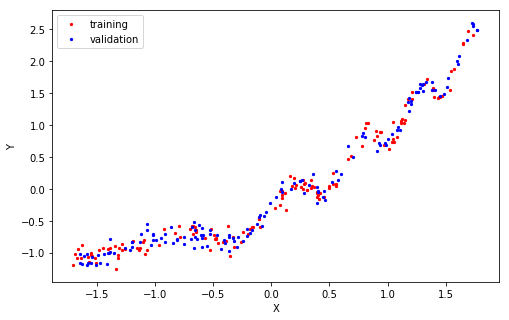

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

np.random.seed(10)

X = np.sort(np.random.uniform(0, 3, 300))
Y_true = 10 * np.sin(np.pi * X * X) + 20 * (X - 0.5) ** 2 + 15 * X 
Y = Y_true + np.random.normal(size=X.shape) * 5

X = scale(X)
Y = scale(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

plt.figure(figsize=(8,5))
plt.scatter(X_train, Y_train, color='red', s=5, label='training')
plt.scatter(X_test, Y_test, color='blue', s=5, label='validation')
plt.xlabel('X')
plt.ylabel('Y');
plt.legend()
plt.show()

In [5]:
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

X_holder = tf.placeholder(tf.float32, shape=[None, 1])
Y_holder = tf.placeholder(tf.float32, shape=[None, 1])

input_n  = 1
hidden_n = 100
output_n = 1

W1 = tf.Variable(tf.random_normal([input_n, hidden_n]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([hidden_n]), dtype=tf.float32)
hidden = tf.tanh(tf.matmul(X_holder, W1) + b1)

W2 = tf.Variable(tf.random_normal([hidden_n, output_n]), dtype=tf.float32)
b2 = tf.Variable(tf.random_normal([output_n]), dtype=tf.float32)
output = tf.matmul(hidden, W2) + b2

loss = tf.reduce_mean(tf.square(output - Y_holder))
dW1, db1, dW2, db2 = tf.gradients(loss, [W1, b1, W2, b2])

sess.run(tf.global_variables_initializer())

iters = 50000
lr = 0.01

W1_update = tf.assign(W1, W1 - lr * dW1)
b1_update = tf.assign(b1, b1 - lr * db1)
W2_update = tf.assign(W2, W2 - lr * dW2)
b2_update = tf.assign(b2, b2 - lr * db2)
    
for i in range(iters):
    
    sess.run([W1_update, b1_update, W2_update, b2_update], {X_holder: X_train, Y_holder: Y_train})
    loss_np = loss.eval({X_holder: X_train, Y_holder: Y_train})

    print('Iter {}: {}'.format(i, loss_np), end='\r')

Instructions for updating:
Colocations handled automatically by placer.


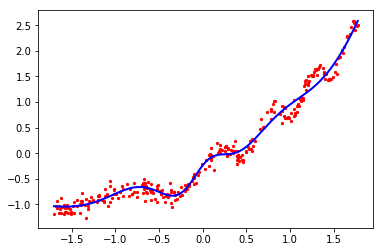

In [6]:
plt.scatter(X, Y, color='red', s=5)
plt.plot(X, sess.run(output, {X_holder: X.reshape(-1,1)}), color='b', linewidth=2)

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
sess.run(tf.global_variables_initializer())

iters = 20000
lr = 0.01
for i in range(iters):
    loss_np,_ = sess.run([loss, train_op], {X_holder: X_train.reshape(-1,1), Y_holder: Y_train.reshape(-1,1)})
    print('Iter {}: {}'.format(i, loss_np), end='\r')

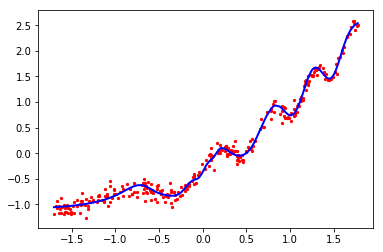

In [12]:
plt.scatter(X, Y, color='red', s=5)
plt.plot(X, sess.run(output, {X_holder: X.reshape(-1,1)}), color='b', linewidth=2)